In [1]:
import os, sys
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandasql import sqldf
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

rpath = os.path.abspath('..')
if rpath not in sys.path:
    sys.path.insert(0, rpath)

import scripts.read_data_from_db as rd
import scripts.data_cleaning as dc
import scripts.utils as util

In [2]:
df = rd.read_data(table_name='processed_data')

INFO:scripts.read_data_from_db:Data fetched succesfully


In [3]:
pysqldf = lambda q: sqldf(q, globals())

### Aggregate user total traffic per application

In [4]:
query = '''
    SELECT
        "MSISDN/Number" AS User_MSISDN,
        SUM("YouTube DL (Bytes)" + "YouTube UL (Bytes)") AS Total_Youtube_Traffic,
        SUM("Netflix DL (Bytes)" + "Netflix UL (Bytes)") AS Total_Netflix_Traffic,
        SUM("Google DL (Bytes)" + "Google UL (Bytes)") AS Total_Google_Traffic,
        SUM("Email DL (Bytes)" + "Email UL (Bytes)") AS Total_Email_Traffic
    FROM df
    GROUP BY "MSISDN/Number";
'''
user_app_df = pysqldf(query)
user_app_df.head()

,User_MSISDN,Total_Youtube_Traffic,Total_Netflix_Traffic,Total_Google_Traffic,Total_Email_Traffic
0,3.360100e+10,21624548.0,27180981.0,4389005.0,1331362.0
1,3.360100e+10,12432223.0,11221763.0,5334863.0,3307781.0
2,3.360100e+10,21333570.0,19353900.0,3443126.0,3205380.0
3,3.360101e+10,6977321.0,1942092.0,9678493.0,2284670.0
4,3.360101e+10,41533002.0,49201724.0,18499616.0,3305469.0


### Top 10 engaged Youtube users

In [7]:
query = ''' 
    SELECT 
        User_MSISDN,
        Total_Youtube_Traffic	
    FROM user_app_df
    ORDER BY Total_Youtube_Traffic DESC
    LIMIT 10
'''
pysqldf(query)

,User_MSISDN,Total_Youtube_Traffic
0,3.362632e+10,2.469257e+10
1,3.362578e+10,4.529588e+08
2,3.376054e+10,3.962892e+08
3,3.361489e+10,3.943702e+08
4,3.367588e+10,3.174106e+08
5,3.366716e+10,3.152313e+08
6,3.362708e+10,3.087908e+08
7,3.376041e+10,3.031691e+08
8,3.369879e+10,3.026620e+08
9,3.360313e+10,2.840901e+08


### Top 10 engaged Netflix users

In [8]:
query = ''' 
    SELECT 
        User_MSISDN,
        Total_Netflix_Traffic	
    FROM user_app_df
    ORDER BY Total_Netflix_Traffic DESC
    LIMIT 10
'''
pysqldf(query)

,User_MSISDN,Total_Netflix_Traffic
0,3.362632e+10,2.455967e+10
1,3.365973e+10,3.995191e+08
2,3.361489e+10,3.614010e+08
3,3.362578e+10,3.569806e+08
4,3.376054e+10,3.346433e+08
5,3.376041e+10,3.183475e+08
6,3.366716e+10,3.139395e+08
7,3.367588e+10,3.090932e+08
8,3.378632e+10,3.059398e+08
9,3.376127e+10,2.920913e+08


### Top Engaged Google Users

In [9]:
query = ''' 
    SELECT 
        User_MSISDN,
        Total_Google_Traffic	
    FROM user_app_df
    ORDER BY Total_Google_Traffic DESC
    LIMIT 10
'''
pysqldf(query)

,User_MSISDN,Total_Google_Traffic
0,3.362632e+10,8.392961e+09
1,3.362578e+10,1.423079e+08
2,3.361489e+10,1.279738e+08
3,3.376054e+10,1.232231e+08
4,3.365973e+10,1.165163e+08
5,3.378632e+10,1.102545e+08
6,3.367588e+10,1.098605e+08
7,3.366716e+10,1.050327e+08
8,3.376127e+10,9.708999e+07
9,3.369876e+10,9.193515e+07


### Top Engaged Email users

In [10]:
query = ''' 
    SELECT 
        User_MSISDN,
        Total_Email_Traffic	
    FROM user_app_df
    ORDER BY Total_Email_Traffic DESC
    LIMIT 10
'''
pysqldf(query)

,User_MSISDN,Total_Email_Traffic
0,3.362632e+10,2.440040e+09
1,3.361489e+10,4.078863e+07
2,3.362578e+10,4.063397e+07
3,3.378632e+10,3.631012e+07
4,3.365973e+10,3.599979e+07
5,3.376054e+10,3.369377e+07
6,3.367588e+10,3.151442e+07
7,3.366546e+10,3.041788e+07
8,3.366716e+10,3.033580e+07
9,3.369879e+10,2.905904e+07


### Most used applications

In [11]:
query = ''' 
    SELECT
        "MSISDN/Number" AS User_MSISDN,
        SUM(Total_Youtube_Traffic) AS Total_Youtube_Traffic,
        SUM(Total_Netflix_Traffic) AS Total_Netflix_Traffic,
        SUM(Total_Google_Traffic) AS Total_Google_Traffic,
        SUM(Total_Email_Traffic) AS Total_Email_Traffic
    FROM user_app_df
    GROUP BY "MSISDN/Number";
'''
pysqldf(query)

,User_MSISDN,Total_Youtube_Traffic,Total_Netflix_Traffic,Total_Google_Traffic,Total_Email_Traffic
0,MSISDN/Number,3.396522e+12,3.394291e+12,1.171094e+12,3.388653e+11


The top used apps are Youtube, Netflix and Google

### Plot of top 3 used applications

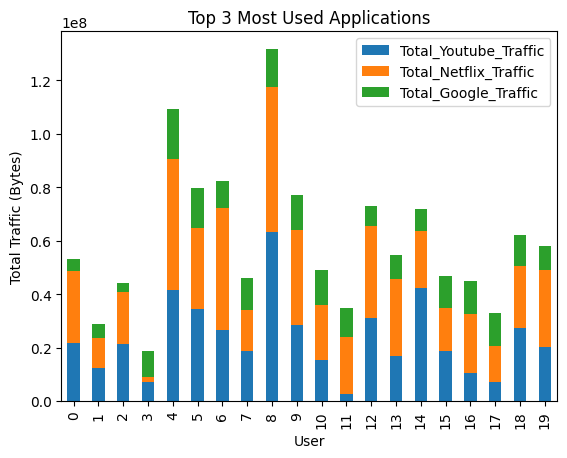

In [6]:
top_3_apps = user_app_df[['Total_Youtube_Traffic', 'Total_Netflix_Traffic', 'Total_Google_Traffic']].head(20)

top_3_apps.plot(kind='bar', stacked=True)
plt.title('Top 3 Most Used Applications')
plt.xlabel('User')
plt.ylabel('Total Traffic (Bytes)')
plt.show()